<a href="https://colab.research.google.com/github/ilanb1/Homework---numpy/blob/main/NumPy_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Create Chess Board


The main idea is to create a "basic unit" (which is white and black squares) and making a long vector from it by duplicating it enough time. Then we reshape it to (size x size) and that trick will create the chess board. We also need to append the last element manually.<br>
This trick only works if the board size is odd number. So if the board size is even number, we create a bigger board and return only part of it.

In [133]:
import numpy as np
import matplotlib.pyplot as plt

In [134]:
def create_chess_board(size):
  
  basic_unit = np.array([1 , 0] , dtype = np.float32)
  
  #if the size is even number, then we will create a board with size +1 so it will be odd.
  if size%2 != 0 :
    temp_size = size
  else:
    temp_size = size + 1

  vector = np.tile(basic_unit ,temp_size**2 // 2)
  vector = np.append(vector , 1)
  
  #generates the board by reshaping the long vector:
  board = vector.reshape((temp_size,temp_size))

  # This line will return the desired size for each case (odd or even): 
  return board[:size , :size]

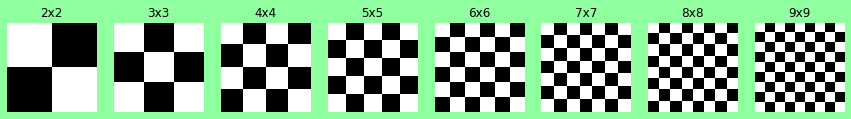

In [135]:
#Testing cell for Q1

#Generating chess boards of different sizes

fig, arr = plt.subplots(1, 8, figsize=(15, 15))

#Adding background color so it will be easier to notice the edges.
fig.set_facecolor('xkcd:mint green')

for board_size in range(2,10):

  arr[board_size -2].imshow(create_chess_board(board_size), cmap="gray")
  arr[board_size -2].set_title(f"{board_size}x{board_size}")
  arr[board_size -2].axis("off")

2. For each row in the board, choose a random value in the range 0-7 and enter a value between 0 and 1 in the drawn slot.

In [4]:
import tensorflow as tf

In [136]:
def draw_exceptional_value(board):
  
  board_size = board.shape[0]

  #Choosing which columns to draw on:
  column_indexes = np.random.randint(low = 0 , high = board_size , size = board_size)
  
  #Choosing what will be the new value:
  random_values = np.random.rand(board_size)

  #Using the built-in function for "one hot encoding" to get matrix of positions:
  drawing_positions = tf.one_hot(column_indexes,depth = board_size, dtype = tf.int32)
  
  #Writing the new values in the selected positions:
  board[np.array(drawing_positions).astype(bool)] = random_values

  return board

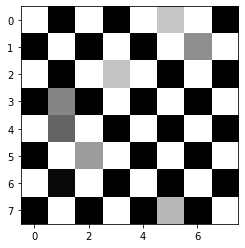

In [138]:
#Testing cell for Q2

# Generating "dirty board" of size 8x8

board = create_chess_board(8)
board = draw_exceptional_value(board)
plt.imshow(board, cmap="gray")

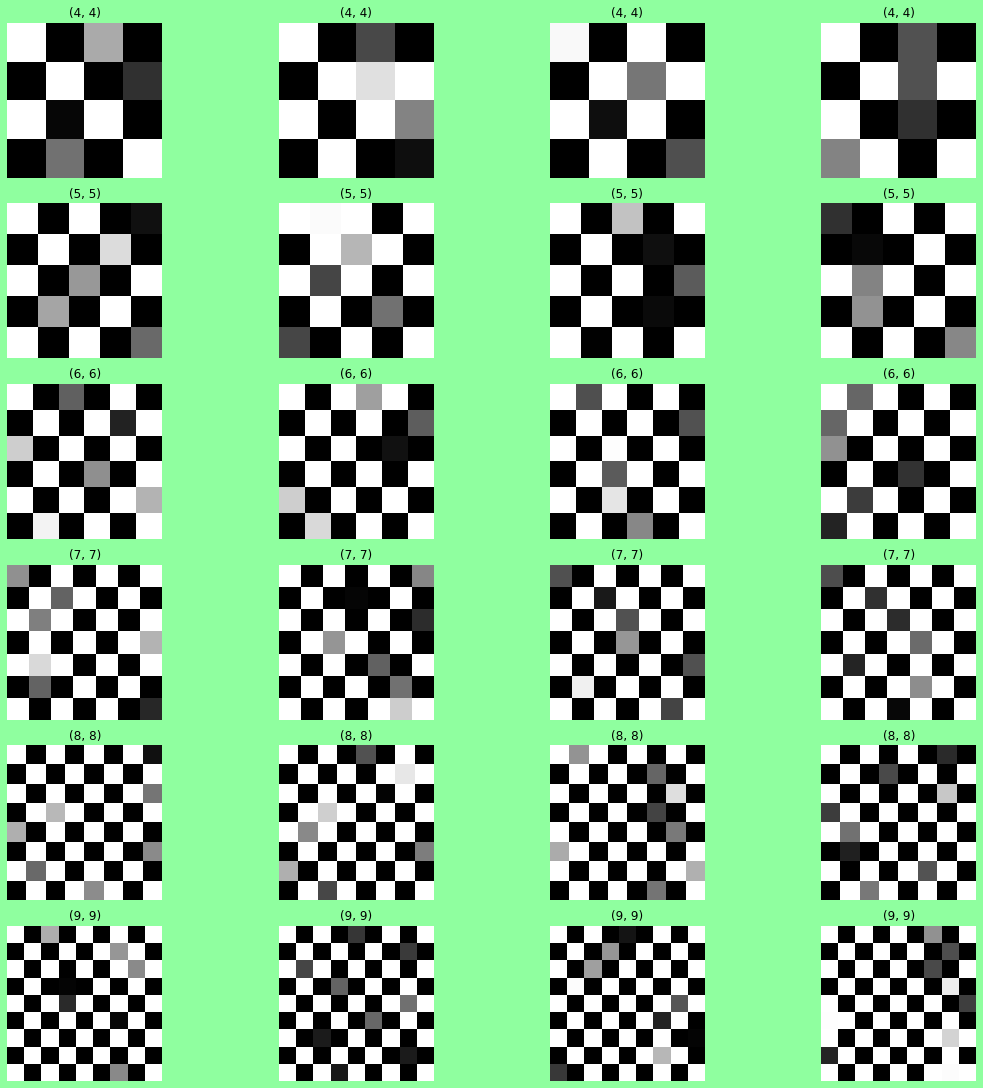

In [139]:
#Another testing cell for Q2

#Testing more cases: different board sizes
#for each board size, we will generate 4 "dirty boards"

num_of_examples = 4
num_of_sizes = 6
starting_size = 4

fig, ax = plt.subplots(num_of_sizes, num_of_examples ,constrained_layout=True, figsize=(15,15))
fig.set_facecolor('xkcd:mint green')

for index in range(num_of_examples * num_of_sizes):
  board = create_chess_board(starting_size + index // num_of_examples)
  board = draw_exceptional_value(board)
  ax[index//num_of_examples , index%num_of_examples].imshow(board, cmap="gray")
  ax[index//num_of_examples , index%num_of_examples].set_title(f"{board.shape}")
  ax[index//num_of_examples , index%num_of_examples].axis("off")

3.  Find the unusual value in each row without using the code that created the board.

In [127]:
def find_unusual_values(board):
  
  unusual_values_positions = (board!=0) & (board!=1)
  unusual_values = board[unusual_values_positions]

  for index, row in enumerate(unusual_values_positions):
    print(f"The unusual value in row {index} is in column {np.argmax(row)} and its value is: {unusual_values[index]:.3f}")

The unusual value in row 0 is in column 6 and its value is: 0.322
The unusual value in row 1 is in column 3 and its value is: 0.679
The unusual value in row 2 is in column 3 and its value is: 0.713
The unusual value in row 3 is in column 0 and its value is: 0.277
The unusual value in row 4 is in column 5 and its value is: 0.053
The unusual value in row 5 is in column 3 and its value is: 0.642
The unusual value in row 6 is in column 6 and its value is: 0.524
The unusual value in row 7 is in column 3 and its value is: 0.300


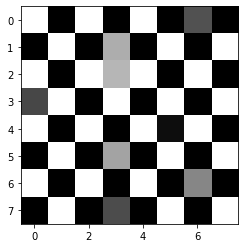

In [141]:
#Testing cell for Q3

#Finding the unusual values for a "dirty board" of size 8x8

#For other board sizes, change this value:
BOARD_SIZE = 8

board = create_chess_board(BOARD_SIZE)
board = draw_exceptional_value(board)
find_unusual_values(board)
plt.imshow(board, cmap="gray")